In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! rm -rf trnet-lite-tesis
! git clone https://gitlab.com/LuiggiTenorioK/trnet-lite-tesis.git

Cloning into 'trnet-lite-tesis'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 66 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (66/66), done.


In [0]:
! cd trnet-lite-tesis && git pull && cd ..

Already up to date.


In [0]:
!ls trnet-lite-tesis

labels	README.md  tests  trained_models  utils


In [0]:
import sys
sys.path.append("./trnet-lite-tesis/")

In [0]:
import utils

In [0]:
import pandas as pd
import numpy as np
import pickle
import gc
import keras
from keras import backend as K

from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Data loading

In [0]:
infile = open('/content/drive/My Drive/Tesis2/Arq7/data/XAL.bin','rb')
xa = pickle.load(infile)
infile.close()
print(xa.shape)

infile = open('/content/drive/My Drive/Tesis2/Arq7/data/XDL.bin','rb')
xd = pickle.load(infile)
infile.close()
print(xd.shape)

(7225, 12, 12, 5)
(7225, 20, 15)


In [0]:
df_Y_total = pd.read_csv('/content/drive/My Drive/Tesis2/Arq7/data/Y.csv')
Y_cols = df_Y_total.columns
print(df_Y_total.shape)
df_Y_total.head()

(7225, 27)


pdb_code chain  class_II  ...  subclass_V_3  subclass_V_4  subclass_V_5
0     1a0r     B       0.0  ...           0.0           0.0           0.0
1     1a0t     P       0.0  ...           0.0           0.0           0.0
2     1a0t     Q       0.0  ...           0.0           0.0           0.0
3     1a12     A       0.0  ...           0.0           0.0           0.0
4     1a12     B       0.0  ...           0.0           0.0           0.0

[5 rows x 27 columns]

# Data splitting and resampled

In [0]:
gc.collect()
selected_class = 'subclass_V_5'

In [0]:
from collections import Counter
y = df_Y_total[selected_class]
Counter(y)

Counter({0.0: 7162, 1.0: 63})

In [0]:
from sklearn.model_selection import train_test_split
xa_train, xa_test, xd_train, xd_test, y_train, y_test = train_test_split(xa, xd, y, random_state=10, test_size=0.2, stratify=y)
print(xa_train.shape, xa_test.shape)
print(xd_train.shape, xd_test.shape)
print(y_train.shape, y_test.shape)
print(Counter(y_test))

(5780, 12, 12, 5) (1445, 12, 12, 5)
(5780, 20, 15) (1445, 20, 15)
(5780,) (1445,)
Counter({0.0: 1432, 1.0: 13})


In [0]:
def ravel_2d(arr):
    dims = (arr.shape[0],np.array(arr.shape[1:]).prod())
    return np.reshape(arr,dims)

In [0]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=20)
xa_resampled, y_resampled = ros.fit_resample(ravel_2d(xa_train), y_train)
xd_resampled, y_resampled2 = ros.fit_resample(ravel_2d(xd_train), y_train)
print((y_resampled==y_resampled2).sum())
print((y_resampled==y_resampled2).sum()==xa_resampled.shape[0])

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


11460
True


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
xa_resampled=xa_resampled.reshape((xa_resampled.shape[0],xa.shape[1],xa.shape[2],xa.shape[3]))
xd_resampled=xd_resampled.reshape((xd_resampled.shape[0],xd.shape[1],xd.shape[2]))
print(xa_resampled.shape)
print(xd_resampled.shape)

(11460, 12, 12, 5)
(11460, 20, 15)


# Training one model

In [0]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/Tesis2/Arq7/model/arq7.h5')

In [0]:
from keras import backend as K
# To get learning rate
print(K.get_value(model.optimizer.lr))
# To set learning rate
K.set_value(model.optimizer.lr, 0.00001)
print(K.get_value(model.optimizer.lr))


1e-04
1e-05


In [0]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
num_epochs = 30
batch_size = 64
history = model.fit([xa_resampled,xd_resampled], y_resampled, shuffle=True,
                    batch_size=batch_size, epochs=num_epochs, verbose=2, validation_split=0.2,
                   callbacks=[es])

Train on 9171 samples, validate on 2293 samples
Epoch 1/30
 - 7s - loss: 0.6228 - acc: 0.6637 - val_loss: 0.7078 - val_acc: 0.4309
Epoch 2/30
 - 2s - loss: 0.5067 - acc: 0.7730 - val_loss: 0.6374 - val_acc: 0.6720
Epoch 3/30
 - 2s - loss: 0.4347 - acc: 0.8246 - val_loss: 0.5577 - val_acc: 0.7231
Epoch 4/30
 - 2s - loss: 0.3750 - acc: 0.8656 - val_loss: 0.4736 - val_acc: 0.7981
Epoch 5/30
 - 2s - loss: 0.3298 - acc: 0.8873 - val_loss: 0.4077 - val_acc: 0.7981
Epoch 6/30
 - 2s - loss: 0.2904 - acc: 0.9016 - val_loss: 0.3413 - val_acc: 0.8591
Epoch 7/30
 - 2s - loss: 0.2590 - acc: 0.9106 - val_loss: 0.2733 - val_acc: 0.9246
Epoch 8/30
 - 2s - loss: 0.2334 - acc: 0.9204 - val_loss: 0.2402 - val_acc: 0.9246
Epoch 9/30
 - 2s - loss: 0.2110 - acc: 0.9287 - val_loss: 0.1958 - val_acc: 0.9442
Epoch 10/30
 - 2s - loss: 0.1933 - acc: 0.9347 - val_loss: 0.1827 - val_acc: 0.9442
Epoch 11/30
 - 2s - loss: 0.1765 - acc: 0.9411 - val_loss: 0.1480 - val_acc: 0.9629
Epoch 12/30
 - 2s - loss: 0.1608 - ac

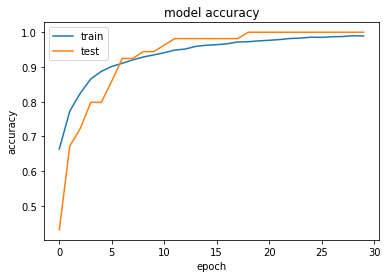

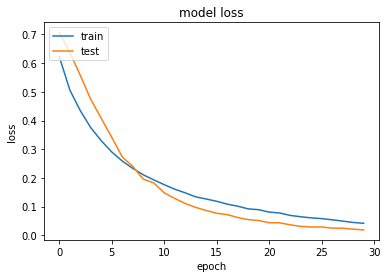

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.evaluate([xa_test,xd_test],y_test)

1446/1446 [==============================] - 0s 142us/step


[0.03707683918660153, 0.9868603042876902]

In [0]:
def filter_threshold(probabilities, threshold):
    return [1 if f >= threshold else 0 for f in probabilities]
  
def get_threshold_measures_df(observed, probabilities):
    import sklearn
    steps = [x / 100.0 for x in range(10, 101, 10)]
    df = pd.DataFrame(columns=['Punto de corte','Accuracy',  'Recall', 'Precision','AUC', 'F1'])

    for i in range(len(steps)):
        estimated_threshold = filter_threshold(probabilities, steps[i])
        row = [
            steps[i],
            sklearn.metrics.accuracy_score(observed, estimated_threshold),
            sklearn.metrics.recall_score(observed, estimated_threshold),
            sklearn.metrics.precision_score(observed, estimated_threshold),
            sklearn.metrics.roc_auc_score(observed, estimated_threshold),
            sklearn.metrics.f1_score(observed,estimated_threshold)
            #sklearn.metrics.auc(observed, estimated_threshold)*2 - 1
        ]
        df.loc[i] = row

    return df
  
get_threshold_measures_df(y_test,model.predict([xa_test,xd_test]))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Punto de corte  Accuracy    Recall  Precision       AUC        F1
0             0.1  0.964730  1.000000   0.203125  0.982205  0.337662
1             0.2  0.975104  0.923077   0.255319  0.949326  0.400000
2             0.3  0.980636  0.923077   0.307692  0.952118  0.461538
3             0.4  0.982019  0.846154   0.314286  0.914703  0.458333
4             0.5  0.986860  0.846154   0.392857  0.917145  0.536585
5             0.6  0.989627  0.846154   0.458333  0.918541  0.594595
6             0.7  0.992393  0.846154   0.550000  0.919937  0.666667
7             0.8  0.993776  0.846154   0.611111  0.920634  0.709677
8             0.9  0.995851  0.846154   0.733333  0.921681  0.785714
9             1.0  0.991010  0.000000   0.000000  0.500000  0.000000

# Training all models

In [0]:
def filter_threshold(probabilities, threshold):
    return [1 if f >= threshold else 0 for f in probabilities]
  
def get_threshold_measures_df(observed, probabilities):
    import sklearn
    steps = [x / 100.0 for x in range(5, 101, 5)]
    df = pd.DataFrame(columns=['Punto de corte','Accuracy',  'Recall', 'Precision','AUC', 'F1', 'F0.5'])

    print("AUC:",sklearn.metrics.roc_auc_score(observed, probabilities))

    for i in range(len(steps)):
        estimated_threshold = filter_threshold(probabilities, steps[i])
        row = [
            steps[i],
            sklearn.metrics.accuracy_score(observed, estimated_threshold),
            sklearn.metrics.recall_score(observed, estimated_threshold),
            sklearn.metrics.precision_score(observed, estimated_threshold),
            sklearn.metrics.roc_auc_score(observed, estimated_threshold),
            sklearn.metrics.f1_score(observed,estimated_threshold),
            sklearn.metrics.fbeta_score(observed,estimated_threshold, beta=0.5)
        ]
        df.loc[i] = row

    return df
  
def ravel_2d(arr):
    dims = (arr.shape[0],np.array(arr.shape[1:]).prod())
    return np.reshape(arr,dims)
  
def resample(xa_train,xd_train,y_train):
  from imblearn.over_sampling import RandomOverSampler
  ros = RandomOverSampler(random_state=20)
  xa_resampled, y_resampled = ros.fit_resample(ravel_2d(xa_train), y_train)
  xd_resampled, y_resampled2 = ros.fit_resample(ravel_2d(xd_train), y_train)
  #print((y_resampled==y_resampled2).sum())
  print("Correct resample: ",(y_resampled==y_resampled2).sum()==xa_resampled.shape[0])
  
  xa_resampled=xa_resampled.reshape((xa_resampled.shape[0],xa.shape[1],xa.shape[2],xa.shape[3]))
  xd_resampled=xd_resampled.reshape((xd_resampled.shape[0],xd.shape[1],xd.shape[2]))
  print(xa_resampled.shape)
  print(xd_resampled.shape)
  
  return xa_resampled, xd_resampled, y_resampled

In [0]:
def automated_train(y,selected_class):
  from sklearn.model_selection import train_test_split
  xa_train, xa_test, xd_train, xd_test, y_train, y_test = train_test_split(xa, xd, y, random_state=10, 
                                                                           test_size=0.2, stratify=y)
  
  xa_train, xa_val, xd_train, xd_val, y_train, y_val = train_test_split(xa_train, xd_train, y_train, random_state=10, 
                                                                           test_size=0.2, stratify=y_train)
  
  from collections import Counter
  print(xa_train.shape, xa_val.shape, xa_test.shape)
  print(xd_train.shape, xd_val.shape, xd_test.shape)
  print(y_train.shape, y_val.shape, y_test.shape)
  print(Counter(y_train), Counter(y_val), Counter(y_test))

  xa_train_resampled, xd_train_resampled, y_train_resampled = resample(xa_train, xd_train, y_train)
  xa_val_resampled, xd_val_resampled, y_val_resampled = resample(xa_val, xd_val, y_val)
  
  import keras
  #from keras.models import load_model
  #model = load_model('/content/drive/My Drive/Tesis2/Arq7/model/arq7.h5')
  #K.set_value(model.optimizer.lr, 0.00001)
  from utils import modeler

  model = modeler.make_arq7_model(selected_class)
  model.compile(optimizer=keras.optimizers.Adam(lr=0.00001), loss='binary_crossentropy', metrics=["accuracy"])

  print(K.get_value(model.optimizer.lr))
  
  from keras.callbacks import EarlyStopping
  es = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
  num_epochs = 50
  batch_size = 64
  history = model.fit([xa_train_resampled, xd_train_resampled], y_train_resampled, 
                      shuffle=True, batch_size=batch_size, epochs=num_epochs, verbose=2, 
                      validation_data=([xa_val_resampled, xd_val_resampled],y_val_resampled),
                     callbacks=[es])
  
  import matplotlib.pyplot as plt
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  
  print(model.evaluate([xa_test,xd_test],y_test))
  
  model.save('/content/drive/My Drive/Tesis2/Arq7/model/trained/'+selected_class+'.h5')
  
  with open('/content/drive/My Drive/Tesis2/Arq7/model/test_data/'+selected_class+'.test','wb') as f:
    pickle.dump([xa_test,xd_test,y_test],f)
  
  print(get_threshold_measures_df(y_test,model.predict([xa_test,xd_test])))
  
  return model

In [0]:
to_train_cols = [#'class_II', 'class_III', 'class_IV', 'class_V',
       'subclass_III_1', 'subclass_III_2', 'subclass_III_3', 'subclass_III_4',
       'subclass_III_5', 'subclass_III_6', 'subclass_IV_1', 'subclass_IV_10',
       'subclass_IV_2', 'subclass_IV_3', 'subclass_IV_4', 'subclass_IV_5',
       'subclass_IV_6', 'subclass_IV_7', 'subclass_IV_8', 'subclass_IV_9',
       'subclass_V_1', 'subclass_V_2', 'subclass_V_3', 'subclass_V_4',
       'subclass_V_5']

Training subclass_III_1 ----------------------------------------------------------
(4624, 12, 12, 5) (1156, 12, 12, 5) (1445, 12, 12, 5)
(4624, 20, 15) (1156, 20, 15) (1445, 20, 15)
(4624,) (1156,) (1445,)
Counter({0.0: 4299, 1.0: 325}) Counter({0.0: 1075, 1.0: 81}) Counter({0.0: 1344, 1.0: 101})
Correct resample:  True
(8598, 12, 12, 5)
(8598, 20, 15)
Correct resample:  True
(2150, 12, 12, 5)
(2150, 20, 15)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 8598 samples, validate on 2150 samples
Epoch 1/50
 - 9s - loss: 0.7198 - accuracy: 0.5542 - val_loss: 0.6402 - val_accuracy: 0.5958
Epoch 2/50
 - 1s - loss: 0.6348 - accuracy: 0.6227 - val_loss: 0.6128 - val_accuracy: 0.6270
Epoch 3/50
 - 1s - loss: 0.5974 - accuracy: 0.6697 - val_loss: 0.5929 - val_accuracy: 0.6535
Epoch 4/50
 - 1s - loss: 0.5637 - accuracy: 0.7002 - val_loss: 0.5545 - val_accuracy: 0.6967
Epoch 5/50
 - 2s - loss: 0.5328 - accuracy: 0.7291 - val_loss: 0.5186 - val_accuracy: 0.7274
Epoch 6/50
 - 1s - loss: 0.5031 - accuracy: 0.7492 - val_loss: 0.5005 - val_accuracy: 0.7400
Epoch 7/50
 - 1s - loss: 0.4809 - accuracy: 0.7658 - val_loss: 0.4721 - val_accuracy: 0.7488
Epoch 8/50
 - 1s - loss: 0.4533 - accuracy: 0.7865 - val_loss: 0.4412 - val_accuracy: 0.7786
Epoch 9/50
 - 1s - loss: 0.4258 - accuracy: 0.8097 - val_loss: 0.4146 - val_accuracy: 0.8149
Epoch 10/50
 - 2s - loss: 0.3904 - accuracy: 0.8428 - val_loss: 0.3911 - val_accuracy: 0.8479
Epoch 11/50
 - 

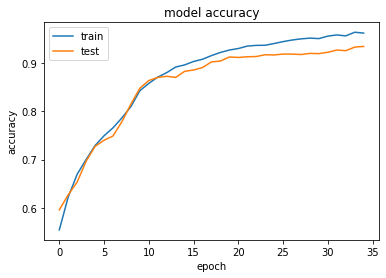

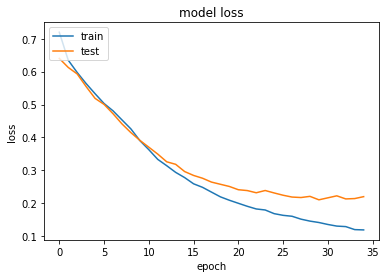

1445/1445 [==============================] - 0s 171us/step
[0.15415837368235044, 0.9529411792755127]
AUC: 0.9833215464403583


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy    Recall  Precision       AUC        F1      F0.5
0             0.05  0.684429  0.990099   0.180180  0.825779  0.304878  0.215424
1             0.10  0.769550  0.980198   0.230233  0.866959  0.372881  0.271829
2             0.15  0.829758  0.980198   0.288630  0.899325  0.445946  0.336049
3             0.20  0.865052  0.980198   0.339041  0.918298  0.503817  0.390071
4             0.25  0.901038  0.980198   0.412500  0.937644  0.580645  0.466541
5             0.30  0.923875  0.980198   0.478261  0.949920  0.642857  0.532831
6             0.35  0.935640  0.970297   0.521277  0.951666  0.678201  0.574443
7             0.40  0.943253  0.960396   0.554286  0.951180  0.702899  0.605493
8             0.45  0.950173  0.950495   0.588957  0.950322  0.727273  0.637450
9             0.50  0.952941  0.930693   0.606452  0.942653  0.734375  0.651872
10            0.55  0.955709  0.910891   0.625850  0.934984  0.741935  0.667634
11            0.60  0.957785  0.910891  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 8646 samples, validate on 2162 samples
Epoch 1/50
 - 2s - loss: 0.6343 - accuracy: 0.6391 - val_loss: 0.6080 - val_accuracy: 0.6980
Epoch 2/50
 - 1s - loss: 0.5438 - accuracy: 0.7562 - val_loss: 0.5361 - val_accuracy: 0.8002
Epoch 3/50
 - 1s - loss: 0.4769 - accuracy: 0.8142 - val_loss: 0.4713 - val_accuracy: 0.8506
Epoch 4/50
 - 1s - loss: 0.4162 - accuracy: 0.8459 - val_loss: 0.4239 - val_accuracy: 0.8654
Epoch 5/50
 - 1s - loss: 0.3686 - accuracy: 0.8662 - val_loss: 0.3849 - val_accuracy: 0.8793
Epoch 6/50
 - 1s - loss: 0.3224 - accuracy: 0.8853 - val_loss: 0.3530 - val_accuracy: 0.8950
Epoch 7/50
 - 1s - loss: 0.2931 - accuracy: 0.8954 - val_loss: 0.3249 - val_accuracy: 0.8964
Epoch 8/50
 - 1s - loss: 0.2656 - accuracy: 0.9059 - val_loss: 0.3117 - val_accuracy: 0.9047
Epoch 9/50
 - 1s - loss: 0.2425 - accuracy: 0.9190 - val_loss: 0.2956 - val_accuracy: 0.9061
Epoch 10/50
 - 1s - loss: 0.2211 - accuracy: 0.9253 - val_loss: 0.2856 - val_accuracy: 0.9107
Epoch 11/50
 - 

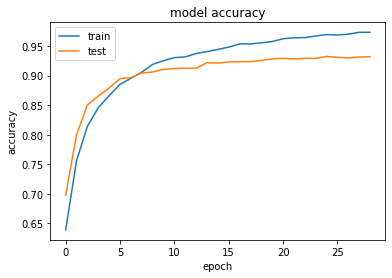

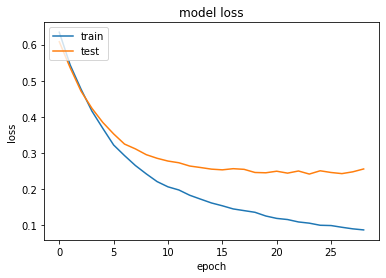

1445/1445 [==============================] - 0s 97us/step
[0.09486462860706563, 0.9743944406509399]
AUC: 0.9649196025009056


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy    Recall  Precision       AUC        F1      F0.5
0             0.05  0.757093  0.957447   0.205950  0.850300  0.338983  0.244300
1             0.10  0.885121  0.936170   0.354839  0.908870  0.514620  0.405157
2             0.15  0.915571  0.936170   0.431373  0.925154  0.590604  0.483516
3             0.20  0.940484  0.936170   0.523810  0.938477  0.671756  0.574413
4             0.25  0.950173  0.936170   0.571429  0.943659  0.709677  0.619718
5             0.30  0.961246  0.936170   0.637681  0.949580  0.758621  0.681115
6             0.35  0.964014  0.936170   0.656716  0.951061  0.771930  0.698413
7             0.40  0.970934  0.936170   0.709677  0.954762  0.807339  0.745763
8             0.45  0.971626  0.914894   0.722689  0.945234  0.807512  0.754386
9             0.50  0.974394  0.914894   0.747826  0.946714  0.822967  0.776173
10            0.55  0.977855  0.904255   0.787037  0.943615  0.841584  0.807985
11            0.60  0.979239  0.893617  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 7538 samples, validate on 1884 samples
Epoch 1/50
 - 2s - loss: 0.5981 - accuracy: 0.6979 - val_loss: 0.4775 - val_accuracy: 0.8583
Epoch 2/50
 - 1s - loss: 0.4256 - accuracy: 0.8616 - val_loss: 0.3672 - val_accuracy: 0.9055
Epoch 3/50
 - 1s - loss: 0.3495 - accuracy: 0.8968 - val_loss: 0.2986 - val_accuracy: 0.9268
Epoch 4/50
 - 1s - loss: 0.2991 - accuracy: 0.9119 - val_loss: 0.2534 - val_accuracy: 0.9342
Epoch 5/50
 - 1s - loss: 0.2623 - accuracy: 0.9274 - val_loss: 0.2215 - val_accuracy: 0.9443
Epoch 6/50
 - 1s - loss: 0.2374 - accuracy: 0.9269 - val_loss: 0.1997 - val_accuracy: 0.9448
Epoch 7/50
 - 1s - loss: 0.2144 - accuracy: 0.9371 - val_loss: 0.1832 - val_accuracy: 0.9416
Epoch 8/50
 - 1s - loss: 0.2032 - accuracy: 0.9371 - val_loss: 0.1694 - val_accuracy: 0.9432
Epoch 9/50
 - 1s - loss: 0.1842 - accuracy: 0.9448 - val_loss: 0.1589 - val_accuracy: 0.9437
Epoch 10/50
 - 1s - loss: 0.1749 - accuracy: 0.9452 - val_loss: 0.1502 - val_accuracy: 0.9443
Epoch 11/50
 - 

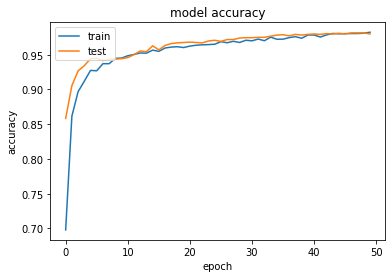

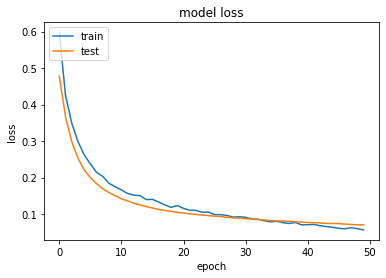

1445/1445 [==============================] - 0s 106us/step
[0.0734867754189304, 0.9764705896377563]
AUC: 0.9956060866192302


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy    Recall  Precision       AUC        F1      F0.5
0             0.05  0.930104  0.992509   0.728022  0.954234  0.839937  0.769008
1             0.10  0.943253  0.992509   0.768116  0.962299  0.866013  0.804493
2             0.15  0.953633  0.992509   0.803030  0.968666  0.887772  0.834909
3             0.20  0.959170  0.988764   0.825000  0.970613  0.899489  0.853264
4             0.25  0.962630  0.981273   0.842444  0.969839  0.906574  0.866976
5             0.30  0.968166  0.981273   0.864686  0.973234  0.919298  0.885734
6             0.35  0.969550  0.981273   0.870432  0.974083  0.922535  0.890551
7             0.40  0.974394  0.981273   0.891156  0.977054  0.934046  0.907831
8             0.45  0.975779  0.977528   0.900000  0.976455  0.937163  0.914506
9             0.50  0.976471  0.977528   0.903114  0.976879  0.938849  0.917077
10            0.55  0.977163  0.977528   0.906250  0.977304  0.940541  0.919662
11            0.60  0.975779  0.970037  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 9092 samples, validate on 2272 samples
Epoch 1/50
 - 2s - loss: 0.7028 - accuracy: 0.5576 - val_loss: 0.6124 - val_accuracy: 0.7403
Epoch 2/50
 - 1s - loss: 0.5574 - accuracy: 0.7430 - val_loss: 0.5361 - val_accuracy: 0.7808
Epoch 3/50
 - 1s - loss: 0.4877 - accuracy: 0.7991 - val_loss: 0.4852 - val_accuracy: 0.7601
Epoch 4/50
 - 1s - loss: 0.4367 - accuracy: 0.8264 - val_loss: 0.4474 - val_accuracy: 0.8033
Epoch 5/50
 - 1s - loss: 0.3934 - accuracy: 0.8513 - val_loss: 0.4146 - val_accuracy: 0.8090
Epoch 6/50
 - 1s - loss: 0.3570 - accuracy: 0.8731 - val_loss: 0.3847 - val_accuracy: 0.8129
Epoch 7/50
 - 1s - loss: 0.3167 - accuracy: 0.8993 - val_loss: 0.3578 - val_accuracy: 0.8336
Epoch 8/50
 - 1s - loss: 0.2898 - accuracy: 0.9142 - val_loss: 0.3321 - val_accuracy: 0.8578
Epoch 9/50
 - 2s - loss: 0.2601 - accuracy: 0.9371 - val_loss: 0.3141 - val_accuracy: 0.8732
Epoch 10/50
 - 1s - loss: 0.2333 - accuracy: 0.9452 - val_loss: 0.3073 - val_accuracy: 0.8666
Epoch 11/50
 - 

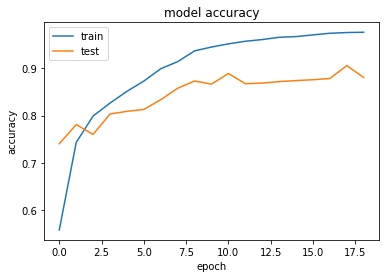

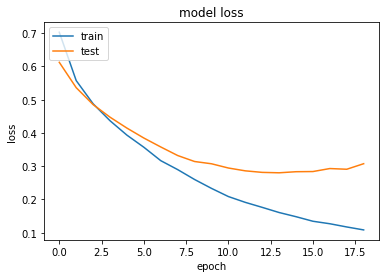

1445/1445 [==============================] - 0s 99us/step
[0.1733422025677242, 0.9453287124633789]
AUC: 0.9830704225352114


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy  Recall  Precision       AUC        F1      F0.5
0             0.05  0.620761    1.00   0.043630  0.807042  0.083612  0.053949
1             0.10  0.680969    1.00   0.051440  0.837676  0.097847  0.063484
2             0.15  0.730796    1.00   0.060386  0.863028  0.113895  0.074360
3             0.20  0.786159    1.00   0.074850  0.891197  0.139276  0.091844
4             0.25  0.836678    1.00   0.095785  0.916901  0.174825  0.116932
5             0.30  0.871972    1.00   0.119048  0.934859  0.212766  0.144509
6             0.35  0.890657    0.96   0.132597  0.924718  0.233010  0.160214
7             0.40  0.916263    0.96   0.166667  0.937746  0.284024  0.199667
8             0.45  0.937716    0.96   0.212389  0.948662  0.347826  0.251572
9             0.50  0.945329    0.96   0.235294  0.952535  0.377953  0.277136
10            0.55  0.955709    0.96   0.275862  0.957817  0.428571  0.321716
11            0.60  0.961938    0.92   0.302632  0.941338  0.455

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 9154 samples, validate on 2288 samples
Epoch 1/50
 - 2s - loss: 0.6454 - accuracy: 0.6626 - val_loss: 0.5986 - val_accuracy: 0.6552
Epoch 2/50
 - 1s - loss: 0.5408 - accuracy: 0.7683 - val_loss: 0.5263 - val_accuracy: 0.6941
Epoch 3/50
 - 1s - loss: 0.4767 - accuracy: 0.7991 - val_loss: 0.4570 - val_accuracy: 0.7732
Epoch 4/50
 - 1s - loss: 0.4316 - accuracy: 0.8191 - val_loss: 0.4124 - val_accuracy: 0.7753
Epoch 5/50
 - 2s - loss: 0.3955 - accuracy: 0.8288 - val_loss: 0.3739 - val_accuracy: 0.7845
Epoch 6/50
 - 1s - loss: 0.3626 - accuracy: 0.8464 - val_loss: 0.3456 - val_accuracy: 0.7880
Epoch 7/50
 - 1s - loss: 0.3322 - accuracy: 0.8625 - val_loss: 0.3216 - val_accuracy: 0.7959
Epoch 8/50
 - 1s - loss: 0.3081 - accuracy: 0.8738 - val_loss: 0.2989 - val_accuracy: 0.8400
Epoch 9/50
 - 1s - loss: 0.2830 - accuracy: 0.8862 - val_loss: 0.2778 - val_accuracy: 0.8479
Epoch 10/50
 - 1s - loss: 0.2606 - accuracy: 0.8996 - val_loss: 0.2572 - val_accuracy: 0.8593
Epoch 11/50
 - 

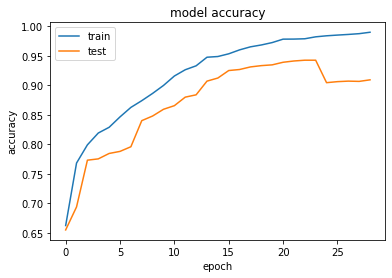

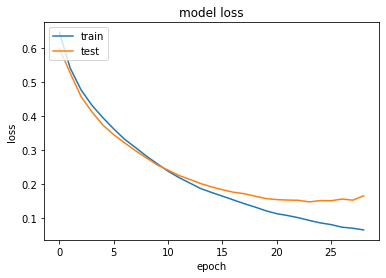

1445/1445 [==============================] - 0s 97us/step
[0.11815226890120951, 0.9640138149261475]
AUC: 0.9579020979020979


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy    Recall  Precision       AUC        F1      F0.5
0             0.05  0.690657  1.000000   0.032468  0.843706  0.062893  0.040258
1             0.10  0.752941  0.933333   0.037838  0.842191  0.072727  0.046823
2             0.15  0.802076  0.933333   0.046823  0.867016  0.089172  0.057803
3             0.20  0.828374  0.866667   0.050193  0.847319  0.094891  0.061846
4             0.25  0.871972  0.800000   0.061856  0.836364  0.114833  0.075853
5             0.30  0.905190  0.800000   0.082192  0.853147  0.149068  0.100167
6             0.35  0.927336  0.800000   0.105263  0.864336  0.186047  0.127389
7             0.40  0.943945  0.800000   0.133333  0.872727  0.228571  0.160000
8             0.45  0.955709  0.800000   0.164384  0.878671  0.272727  0.195440
9             0.50  0.964014  0.800000   0.196721  0.882867  0.315789  0.231660
10            0.55  0.973010  0.800000   0.250000  0.887413  0.380952  0.289855
11            0.60  0.977163  0.733333  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 9188 samples, validate on 2296 samples
Epoch 1/50
 - 2s - loss: 0.6863 - accuracy: 0.5369 - val_loss: 0.5937 - val_accuracy: 0.6655
Epoch 2/50
 - 1s - loss: 0.5382 - accuracy: 0.7681 - val_loss: 0.4753 - val_accuracy: 0.9556
Epoch 3/50
 - 1s - loss: 0.4402 - accuracy: 0.8722 - val_loss: 0.3802 - val_accuracy: 0.9747
Epoch 4/50
 - 1s - loss: 0.3551 - accuracy: 0.9264 - val_loss: 0.3011 - val_accuracy: 0.9834
Epoch 5/50
 - 1s - loss: 0.2805 - accuracy: 0.9525 - val_loss: 0.2390 - val_accuracy: 0.9861
Epoch 6/50
 - 1s - loss: 0.2217 - accuracy: 0.9647 - val_loss: 0.1923 - val_accuracy: 0.9869
Epoch 7/50
 - 1s - loss: 0.1745 - accuracy: 0.9757 - val_loss: 0.1571 - val_accuracy: 0.9869
Epoch 8/50
 - 1s - loss: 0.1387 - accuracy: 0.9815 - val_loss: 0.1293 - val_accuracy: 0.9891
Epoch 9/50
 - 1s - loss: 0.1100 - accuracy: 0.9874 - val_loss: 0.1113 - val_accuracy: 0.9913
Epoch 10/50
 - 1s - loss: 0.0906 - accuracy: 0.9893 - val_loss: 0.0955 - val_accuracy: 0.9922
Epoch 11/50
 - 

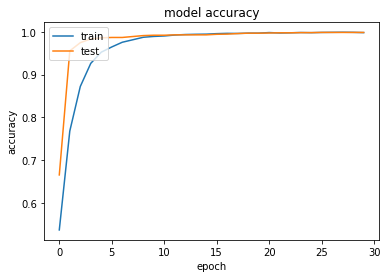

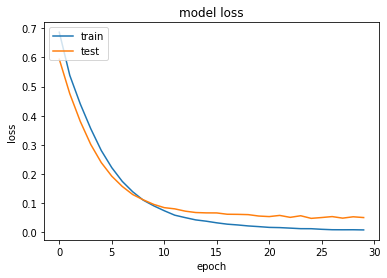

1445/1445 [==============================] - 0s 97us/step
[0.014139979255303522, 0.9965397715568542]
AUC: 0.991567944250871


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy  Recall  Precision       AUC        F1      F0.5
0             0.05  0.975087     0.9   0.204545  0.937805  0.333333  0.241935
1             0.10  0.984083     0.9   0.290323  0.942334  0.439024  0.335821
2             0.15  0.988235     0.8   0.347826  0.894774  0.484848  0.392157
3             0.20  0.990311     0.8   0.400000  0.895819  0.533333  0.444444
4             0.25  0.991696     0.8   0.444444  0.896516  0.571429  0.487805
5             0.30  0.993772     0.7   0.538462  0.847909  0.608696  0.564516
6             0.35  0.994464     0.7   0.583333  0.848258  0.636364  0.603448
7             0.40  0.995156     0.7   0.636364  0.848606  0.666667  0.648148
8             0.45  0.995848     0.7   0.700000  0.848955  0.700000  0.700000
9             0.50  0.996540     0.7   0.777778  0.849303  0.736842  0.760870
10            0.55  0.996540     0.7   0.777778  0.849303  0.736842  0.760870
11            0.60  0.997232     0.7   0.875000  0.849652  0.777

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 7848 samples, validate on 1962 samples
Epoch 1/50
 - 2s - loss: 0.6961 - accuracy: 0.6339 - val_loss: 0.6262 - val_accuracy: 0.7941
Epoch 2/50
 - 1s - loss: 0.5467 - accuracy: 0.7951 - val_loss: 0.5003 - val_accuracy: 0.8838
Epoch 3/50
 - 1s - loss: 0.4709 - accuracy: 0.8419 - val_loss: 0.4196 - val_accuracy: 0.9006
Epoch 4/50
 - 1s - loss: 0.4188 - accuracy: 0.8658 - val_loss: 0.3691 - val_accuracy: 0.9052
Epoch 5/50
 - 1s - loss: 0.3795 - accuracy: 0.8786 - val_loss: 0.3349 - val_accuracy: 0.9077
Epoch 6/50
 - 1s - loss: 0.3481 - accuracy: 0.8837 - val_loss: 0.3047 - val_accuracy: 0.9113
Epoch 7/50
 - 1s - loss: 0.3199 - accuracy: 0.8919 - val_loss: 0.2798 - val_accuracy: 0.9190
Epoch 8/50
 - 1s - loss: 0.2961 - accuracy: 0.9024 - val_loss: 0.2584 - val_accuracy: 0.9246
Epoch 9/50
 - 1s - loss: 0.2697 - accuracy: 0.9062 - val_loss: 0.2391 - val_accuracy: 0.9317
Epoch 10/50
 - 1s - loss: 0.2584 - accuracy: 0.9103 - val_loss: 0.2245 - val_accuracy: 0.9358
Epoch 11/50
 - 

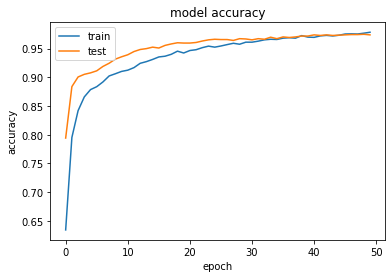

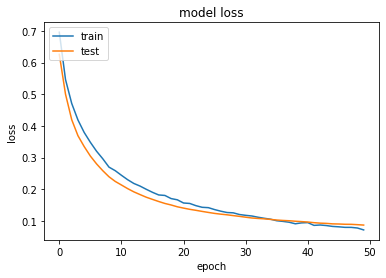

1445/1445 [==============================] - 0s 99us/step
[0.07012624611633356, 0.9764705896377563]
AUC: 0.9966032760508615


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy    Recall  Precision       AUC        F1      F0.5
0             0.05  0.905882  1.000000   0.616901  0.944535  0.763066  0.668090
1             0.10  0.932872  0.995434   0.694268  0.958565  0.818011  0.738983
2             0.15  0.946713  0.995434   0.741497  0.966722  0.849903  0.781362
3             0.20  0.954325  0.995434   0.770318  0.971208  0.868526  0.806810
4             0.25  0.959170  0.995434   0.789855  0.974063  0.880808  0.823885
5             0.30  0.966090  0.995434   0.819549  0.978141  0.898969  0.849571
6             0.35  0.970242  0.995434   0.838462  0.980588  0.910230  0.865766
7             0.40  0.973010  0.995434   0.851562  0.982219  0.917895  0.876911
8             0.45  0.975087  0.995434   0.861660  0.983443  0.923729  0.885459
9             0.50  0.976471  0.990868   0.871486  0.982383  0.927350  0.893004
10            0.55  0.977855  0.990868   0.878543  0.983199  0.931330  0.898923
11            0.60  0.979931  0.981735  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 9190 samples, validate on 2298 samples
Epoch 1/50
 - 2s - loss: 0.7650 - accuracy: 0.5312 - val_loss: 0.5550 - val_accuracy: 0.7367
Epoch 2/50
 - 1s - loss: 0.5115 - accuracy: 0.8042 - val_loss: 0.4505 - val_accuracy: 0.9151
Epoch 3/50
 - 1s - loss: 0.4143 - accuracy: 0.8899 - val_loss: 0.3743 - val_accuracy: 0.9047
Epoch 4/50
 - 1s - loss: 0.3481 - accuracy: 0.9037 - val_loss: 0.3202 - val_accuracy: 0.9025
Epoch 5/50
 - 1s - loss: 0.3006 - accuracy: 0.9065 - val_loss: 0.2823 - val_accuracy: 0.9043
Epoch 6/50
 - 1s - loss: 0.2636 - accuracy: 0.9135 - val_loss: 0.2527 - val_accuracy: 0.9086
Epoch 7/50
 - 1s - loss: 0.2333 - accuracy: 0.9205 - val_loss: 0.2274 - val_accuracy: 0.9151
Epoch 8/50
 - 1s - loss: 0.2043 - accuracy: 0.9294 - val_loss: 0.2060 - val_accuracy: 0.9225
Epoch 9/50
 - 1s - loss: 0.1832 - accuracy: 0.9336 - val_loss: 0.1853 - val_accuracy: 0.9273
Epoch 10/50
 - 1s - loss: 0.1604 - accuracy: 0.9435 - val_loss: 0.1689 - val_accuracy: 0.9386
Epoch 11/50
 - 

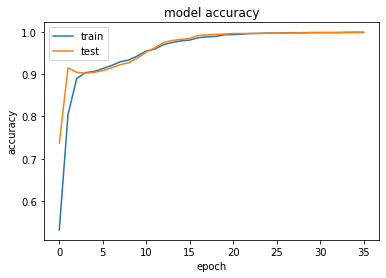

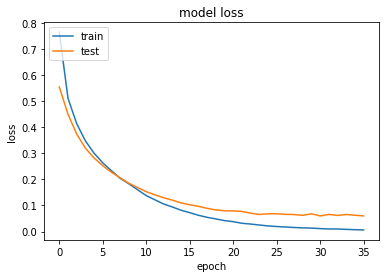

1445/1445 [==============================] - 0s 98us/step
[0.009108454543449348, 0.9979238510131836]
AUC: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy  Recall  Precision       AUC        F1      F0.5
0             0.05  0.961246     1.0   0.138462  0.980501  0.243243  0.167286
1             0.10  0.973702     1.0   0.191489  0.986769  0.321429  0.228426
2             0.15  0.990311     1.0   0.391304  0.995125  0.562500  0.445545
3             0.20  0.993080     1.0   0.473684  0.996518  0.642857  0.529412
4             0.25  0.993772     1.0   0.500000  0.996866  0.666667  0.555556
5             0.30  0.995848     1.0   0.600000  0.997911  0.750000  0.652174
6             0.35  0.995848     1.0   0.600000  0.997911  0.750000  0.652174
7             0.40  0.996540     1.0   0.642857  0.998259  0.782609  0.692308
8             0.45  0.997924     1.0   0.750000  0.998955  0.857143  0.789474
9             0.50  0.997924     1.0   0.750000  0.998955  0.857143  0.789474
10            0.55  0.999308     1.0   0.900000  0.999652  0.947368  0.918367
11            0.60  1.000000     1.0   1.000000  1.000000  1.000

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 8138 samples, validate on 2034 samples
Epoch 1/50
 - 2s - loss: 0.6020 - accuracy: 0.6570 - val_loss: 0.5164 - val_accuracy: 0.8294
Epoch 2/50
 - 1s - loss: 0.4714 - accuracy: 0.8229 - val_loss: 0.4244 - val_accuracy: 0.8687
Epoch 3/50
 - 1s - loss: 0.4054 - accuracy: 0.8495 - val_loss: 0.3600 - val_accuracy: 0.8658
Epoch 4/50
 - 1s - loss: 0.3683 - accuracy: 0.8543 - val_loss: 0.3227 - val_accuracy: 0.8835
Epoch 5/50
 - 1s - loss: 0.3383 - accuracy: 0.8669 - val_loss: 0.3002 - val_accuracy: 0.8913
Epoch 6/50
 - 1s - loss: 0.3200 - accuracy: 0.8740 - val_loss: 0.2814 - val_accuracy: 0.8933
Epoch 7/50
 - 1s - loss: 0.3039 - accuracy: 0.8755 - val_loss: 0.2687 - val_accuracy: 0.8977
Epoch 8/50
 - 1s - loss: 0.2931 - accuracy: 0.8808 - val_loss: 0.2581 - val_accuracy: 0.8982
Epoch 9/50
 - 1s - loss: 0.2825 - accuracy: 0.8831 - val_loss: 0.2485 - val_accuracy: 0.9012
Epoch 10/50
 - 1s - loss: 0.2748 - accuracy: 0.8874 - val_loss: 0.2405 - val_accuracy: 0.9027
Epoch 11/50
 - 

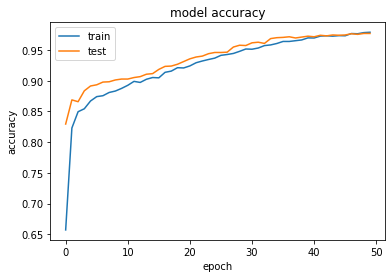

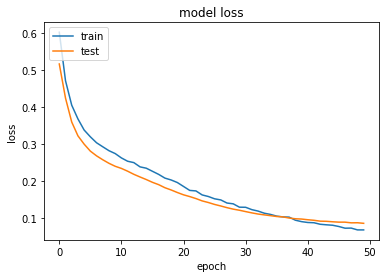

1445/1445 [==============================] - 0s 105us/step
[0.06048654032854813, 0.9730103611946106]
AUC: 0.9974915476060638


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy    Recall  Precision       AUC        F1      F0.5
0             0.05  0.880277  1.000000   0.500000  0.931997  0.666667  0.555556
1             0.10  0.922491  1.000000   0.607018  0.955975  0.755459  0.658797
2             0.15  0.943945  1.000000   0.681102  0.968160  0.810304  0.727502
3             0.20  0.949481  1.000000   0.703252  0.971305  0.825776  0.747623
4             0.25  0.955017  1.000000   0.726891  0.974450  0.841849  0.768889
5             0.30  0.961246  1.000000   0.755459  0.977987  0.860697  0.794307
6             0.35  0.967474  0.994220   0.788991  0.979028  0.879795  0.822967
7             0.40  0.969550  0.988439   0.802817  0.977710  0.886010  0.834146
8             0.45  0.971626  0.988439   0.814286  0.978889  0.892950  0.844028
9             0.50  0.973010  0.965318   0.835000  0.969687  0.895442  0.858171
10            0.55  0.976471  0.953757   0.863874  0.966658  0.906593  0.880470
11            0.60  0.982007  0.953757  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 9218 samples, validate on 2304 samples
Epoch 1/50
 - 2s - loss: 0.5338 - accuracy: 0.7747 - val_loss: 0.4806 - val_accuracy: 0.9240
Epoch 2/50
 - 1s - loss: 0.3768 - accuracy: 0.8748 - val_loss: 0.3556 - val_accuracy: 0.8963
Epoch 3/50
 - 1s - loss: 0.2987 - accuracy: 0.8941 - val_loss: 0.2953 - val_accuracy: 0.8958
Epoch 4/50
 - 1s - loss: 0.2510 - accuracy: 0.9078 - val_loss: 0.2559 - val_accuracy: 0.9062
Epoch 5/50
 - 1s - loss: 0.2074 - accuracy: 0.9312 - val_loss: 0.2219 - val_accuracy: 0.9388
Epoch 6/50
 - 1s - loss: 0.1721 - accuracy: 0.9548 - val_loss: 0.1924 - val_accuracy: 0.9666
Epoch 7/50
 - 1s - loss: 0.1374 - accuracy: 0.9741 - val_loss: 0.1684 - val_accuracy: 0.9744
Epoch 8/50
 - 1s - loss: 0.1093 - accuracy: 0.9822 - val_loss: 0.1503 - val_accuracy: 0.9805
Epoch 9/50
 - 1s - loss: 0.0880 - accuracy: 0.9841 - val_loss: 0.1320 - val_accuracy: 0.9857
Epoch 10/50
 - 1s - loss: 0.0738 - accuracy: 0.9867 - val_loss: 0.1220 - val_accuracy: 0.9874
Epoch 11/50
 - 

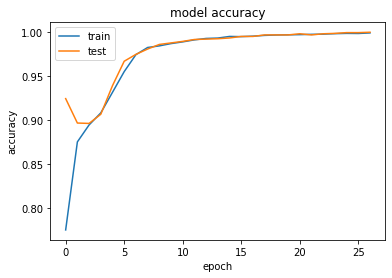

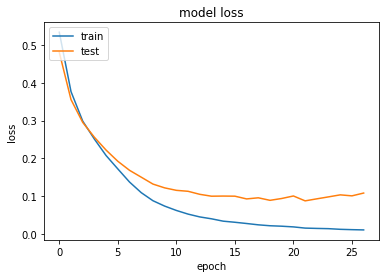

1445/1445 [==============================] - 0s 96us/step
[0.017117809576778366, 0.9965397715568542]
AUC: 0.9997222222222223


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy  Recall  Precision       AUC        F1      F0.5
0             0.05  0.942561     1.0   0.056818  0.971181  0.107527  0.070028
1             0.10  0.971626     1.0   0.108696  0.985764  0.196078  0.132275
2             0.15  0.978547     1.0   0.138889  0.989236  0.243902  0.167785
3             0.20  0.983391     1.0   0.172414  0.991667  0.294118  0.206612
4             0.25  0.987543     1.0   0.217391  0.993750  0.357143  0.257732
5             0.30  0.988235     1.0   0.227273  0.994097  0.370370  0.268817
6             0.35  0.991003     1.0   0.277778  0.995486  0.434783  0.324675
7             0.40  0.991696     1.0   0.294118  0.995833  0.454545  0.342466
8             0.45  0.995156     1.0   0.416667  0.997569  0.588235  0.471698
9             0.50  0.996540     1.0   0.500000  0.998264  0.666667  0.555556
10            0.55  0.997232     1.0   0.555556  0.998611  0.714286  0.609756
11            0.60  0.997924     1.0   0.625000  0.998958  0.769

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 7782 samples, validate on 1946 samples
Epoch 1/50
 - 2s - loss: 0.7091 - accuracy: 0.6049 - val_loss: 0.5704 - val_accuracy: 0.8160
Epoch 2/50
 - 1s - loss: 0.5620 - accuracy: 0.7457 - val_loss: 0.4873 - val_accuracy: 0.8541
Epoch 3/50
 - 1s - loss: 0.4858 - accuracy: 0.7956 - val_loss: 0.4284 - val_accuracy: 0.8535
Epoch 4/50
 - 1s - loss: 0.4498 - accuracy: 0.8273 - val_loss: 0.3908 - val_accuracy: 0.8649
Epoch 5/50
 - 1s - loss: 0.4158 - accuracy: 0.8371 - val_loss: 0.3663 - val_accuracy: 0.8659
Epoch 6/50
 - 1s - loss: 0.3937 - accuracy: 0.8476 - val_loss: 0.3467 - val_accuracy: 0.8659
Epoch 7/50
 - 1s - loss: 0.3737 - accuracy: 0.8538 - val_loss: 0.3288 - val_accuracy: 0.8710
Epoch 8/50
 - 1s - loss: 0.3613 - accuracy: 0.8634 - val_loss: 0.3147 - val_accuracy: 0.8808
Epoch 9/50
 - 1s - loss: 0.3418 - accuracy: 0.8705 - val_loss: 0.2992 - val_accuracy: 0.8998
Epoch 10/50
 - 1s - loss: 0.3266 - accuracy: 0.8759 - val_loss: 0.2865 - val_accuracy: 0.9013
Epoch 11/50
 - 

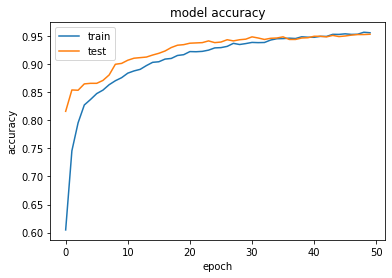

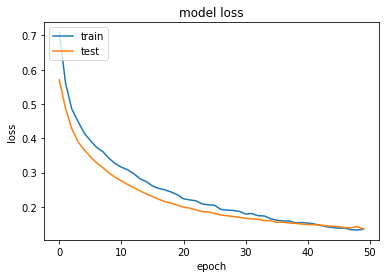

1445/1445 [==============================] - 0s 102us/step
[0.14472310582504552, 0.9474048614501953]
AUC: 0.982026401976557


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy    Recall  Precision       AUC        F1      F0.5
0             0.05  0.800000  0.986900   0.441406  0.875851  0.609987  0.496267
1             0.10  0.867128  0.982533   0.544794  0.913964  0.700935  0.598086
2             0.15  0.898962  0.965066   0.615599  0.925789  0.751701  0.663664
3             0.20  0.917647  0.960699   0.666667  0.935119  0.787120  0.710136
4             0.25  0.926644  0.960699   0.694006  0.940464  0.805861  0.734803
5             0.30  0.932180  0.956332   0.713355  0.941982  0.817164  0.751544
6             0.35  0.937716  0.947598   0.735593  0.941727  0.828244  0.770050
7             0.40  0.942561  0.947598   0.753472  0.944605  0.839458  0.785663
8             0.45  0.946713  0.943231   0.771429  0.945300  0.848723  0.800593
9             0.50  0.947405  0.934498   0.778182  0.942167  0.849206  0.805117
10            0.55  0.948789  0.921397   0.790262  0.937672  0.850806  0.813416
11            0.60  0.947405  0.895197  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 9008 samples, validate on 2252 samples
Epoch 1/50
 - 2s - loss: 0.5966 - accuracy: 0.6935 - val_loss: 0.5159 - val_accuracy: 0.9174
Epoch 2/50
 - 1s - loss: 0.3569 - accuracy: 0.9031 - val_loss: 0.2864 - val_accuracy: 0.9489
Epoch 3/50
 - 2s - loss: 0.2402 - accuracy: 0.9447 - val_loss: 0.1952 - val_accuracy: 0.9543
Epoch 4/50
 - 1s - loss: 0.1782 - accuracy: 0.9606 - val_loss: 0.1520 - val_accuracy: 0.9725
Epoch 5/50
 - 1s - loss: 0.1395 - accuracy: 0.9696 - val_loss: 0.1279 - val_accuracy: 0.9751
Epoch 6/50
 - 1s - loss: 0.1131 - accuracy: 0.9751 - val_loss: 0.1112 - val_accuracy: 0.9756
Epoch 7/50
 - 1s - loss: 0.0933 - accuracy: 0.9811 - val_loss: 0.0987 - val_accuracy: 0.9769
Epoch 8/50
 - 2s - loss: 0.0777 - accuracy: 0.9843 - val_loss: 0.0925 - val_accuracy: 0.9614
Epoch 9/50
 - 1s - loss: 0.0664 - accuracy: 0.9860 - val_loss: 0.0861 - val_accuracy: 0.9618
Epoch 10/50
 - 1s - loss: 0.0569 - accuracy: 0.9872 - val_loss: 0.0802 - val_accuracy: 0.9623
Epoch 11/50
 - 

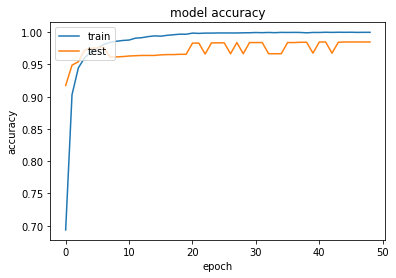

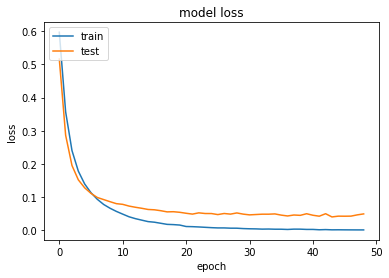

1445/1445 [==============================] - 0s 113us/step
[0.0058383041726317335, 0.9993079304695129]
AUC: 0.9987331081081081


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy    Recall  Precision       AUC        F1      F0.5
0             0.05  0.995156  0.972973   0.857143  0.984356  0.911392  0.878049
1             0.10  0.996540  0.972973   0.900000  0.985066  0.935065  0.913706
2             0.15  0.997232  0.972973   0.923077  0.985421  0.947368  0.932642
3             0.20  0.997924  0.972973   0.947368  0.985776  0.960000  0.952381
4             0.25  0.999308  0.972973   1.000000  0.986486  0.986301  0.994475
5             0.30  0.999308  0.972973   1.000000  0.986486  0.986301  0.994475
6             0.35  0.999308  0.972973   1.000000  0.986486  0.986301  0.994475
7             0.40  0.999308  0.972973   1.000000  0.986486  0.986301  0.994475
8             0.45  0.999308  0.972973   1.000000  0.986486  0.986301  0.994475
9             0.50  0.999308  0.972973   1.000000  0.986486  0.986301  0.994475
10            0.55  0.999308  0.972973   1.000000  0.986486  0.986301  0.994475
11            0.60  0.999308  0.972973  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 9220 samples, validate on 2304 samples
Epoch 1/50
 - 2s - loss: 0.5809 - accuracy: 0.7407 - val_loss: 0.5987 - val_accuracy: 0.7930
Epoch 2/50
 - 1s - loss: 0.3891 - accuracy: 0.8823 - val_loss: 0.5572 - val_accuracy: 0.9271
Epoch 3/50
 - 1s - loss: 0.3012 - accuracy: 0.9103 - val_loss: 0.5866 - val_accuracy: 0.5942
Epoch 4/50
 - 1s - loss: 0.2335 - accuracy: 0.9307 - val_loss: 0.6531 - val_accuracy: 0.6107
Epoch 5/50
 - 1s - loss: 0.1834 - accuracy: 0.9463 - val_loss: 0.7407 - val_accuracy: 0.6172
Epoch 6/50
 - 2s - loss: 0.1532 - accuracy: 0.9542 - val_loss: 0.8736 - val_accuracy: 0.6207
Epoch 7/50
 - 1s - loss: 0.1221 - accuracy: 0.9668 - val_loss: 0.9663 - val_accuracy: 0.6220


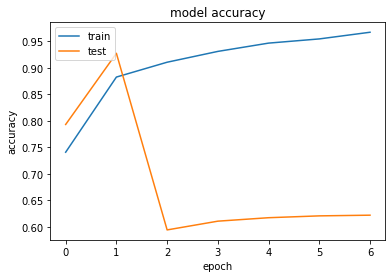

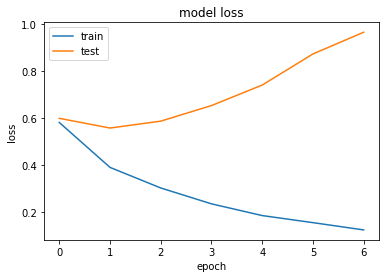

1445/1445 [==============================] - 0s 98us/step
[0.49251929401938893, 0.8615916967391968]
AUC: 0.9565277777777778


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy  Recall  Precision       AUC        F1      F0.5
0             0.05  0.003460     1.0   0.003460  0.500000  0.006897  0.004322
1             0.10  0.003460     1.0   0.003460  0.500000  0.006897  0.004322
2             0.15  0.003460     1.0   0.003460  0.500000  0.006897  0.004322
3             0.20  0.003460     1.0   0.003460  0.500000  0.006897  0.004322
4             0.25  0.040830     1.0   0.003595  0.518750  0.007163  0.004489
5             0.30  0.510035     1.0   0.007013  0.754167  0.013928  0.008750
6             0.35  0.658824     1.0   0.010040  0.828819  0.019881  0.012519
7             0.40  0.748789     1.0   0.013587  0.873958  0.026810  0.016926
8             0.45  0.818685     1.0   0.018727  0.909028  0.036765  0.023299
9             0.50  0.861592     1.0   0.024390  0.930556  0.047619  0.030303
10            0.55  0.889273     1.0   0.030303  0.944444  0.058824  0.037594
11            0.60  0.916955     0.6   0.024793  0.759028  0.047

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 9242 samples, validate on 2310 samples
Epoch 1/50
 - 2s - loss: 0.5584 - accuracy: 0.7196 - val_loss: 0.4272 - val_accuracy: 0.9766
Epoch 2/50
 - 1s - loss: 0.3335 - accuracy: 0.9340 - val_loss: 0.2753 - val_accuracy: 0.9935
Epoch 3/50
 - 1s - loss: 0.2191 - accuracy: 0.9798 - val_loss: 0.1769 - val_accuracy: 0.9978
Epoch 4/50
 - 1s - loss: 0.1468 - accuracy: 0.9909 - val_loss: 0.1125 - val_accuracy: 0.9987
Epoch 5/50
 - 1s - loss: 0.1010 - accuracy: 0.9944 - val_loss: 0.0785 - val_accuracy: 1.0000
Epoch 6/50
 - 1s - loss: 0.0699 - accuracy: 0.9969 - val_loss: 0.0526 - val_accuracy: 1.0000
Epoch 7/50
 - 1s - loss: 0.0499 - accuracy: 0.9979 - val_loss: 0.0376 - val_accuracy: 1.0000
Epoch 8/50
 - 1s - loss: 0.0359 - accuracy: 0.9992 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 9/50
 - 1s - loss: 0.0265 - accuracy: 0.9994 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 10/50
 - 1s - loss: 0.0205 - accuracy: 0.9992 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 11/50
 - 

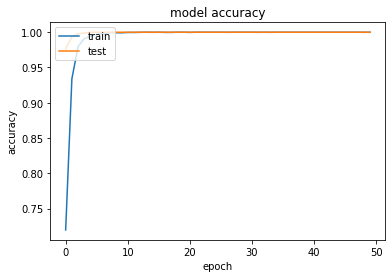

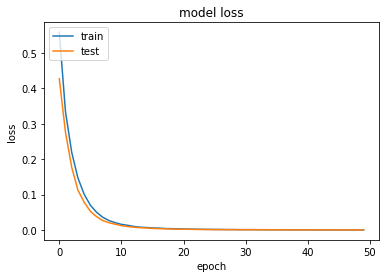

1445/1445 [==============================] - 0s 99us/step
[0.0006403481074441042, 0.9993079304695129]
AUC: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

    Punto de corte  Accuracy  Recall  Precision  AUC   F1  F0.5
0             0.05  1.000000     1.0        1.0  1.0  1.0   1.0
1             0.10  1.000000     1.0        1.0  1.0  1.0   1.0
2             0.15  1.000000     1.0        1.0  1.0  1.0   1.0
3             0.20  1.000000     1.0        1.0  1.0  1.0   1.0
4             0.25  1.000000     1.0        1.0  1.0  1.0   1.0
5             0.30  1.000000     1.0        1.0  1.0  1.0   1.0
6             0.35  1.000000     1.0        1.0  1.0  1.0   1.0
7             0.40  1.000000     1.0        1.0  1.0  1.0   1.0
8             0.45  0.999308     0.0        0.0  0.5  0.0   0.0
9             0.50  0.999308     0.0        0.0  0.5  0.0   0.0
10            0.55  0.999308     0.0        0.0  0.5  0.0   0.0
11            0.60  0.999308     0.0        0.0  0.5  0.0   0.0
12            0.65  0.999308     0.0        0.0  0.5  0.0   0.0
13            0.70  0.999308     0.0        0.0  0.5  0.0   0.0
14            0.75  0.999308     0.0    

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 9028 samples, validate on 2256 samples
Epoch 1/50
 - 2s - loss: 0.6301 - accuracy: 0.6521 - val_loss: 0.5089 - val_accuracy: 0.8112
Epoch 2/50
 - 2s - loss: 0.5054 - accuracy: 0.7620 - val_loss: 0.4312 - val_accuracy: 0.8506
Epoch 3/50
 - 1s - loss: 0.4583 - accuracy: 0.7946 - val_loss: 0.3918 - val_accuracy: 0.8710
Epoch 4/50
 - 1s - loss: 0.4267 - accuracy: 0.8189 - val_loss: 0.3636 - val_accuracy: 0.8927
Epoch 5/50
 - 1s - loss: 0.4034 - accuracy: 0.8304 - val_loss: 0.3413 - val_accuracy: 0.9105
Epoch 6/50
 - 1s - loss: 0.3812 - accuracy: 0.8424 - val_loss: 0.3214 - val_accuracy: 0.9140
Epoch 7/50
 - 2s - loss: 0.3606 - accuracy: 0.8558 - val_loss: 0.3035 - val_accuracy: 0.9162
Epoch 8/50
 - 1s - loss: 0.3432 - accuracy: 0.8662 - val_loss: 0.2879 - val_accuracy: 0.9198
Epoch 9/50
 - 1s - loss: 0.3230 - accuracy: 0.8749 - val_loss: 0.2735 - val_accuracy: 0.9246
Epoch 10/50
 - 1s - loss: 0.3057 - accuracy: 0.8870 - val_loss: 0.2628 - val_accuracy: 0.9269
Epoch 11/50
 - 

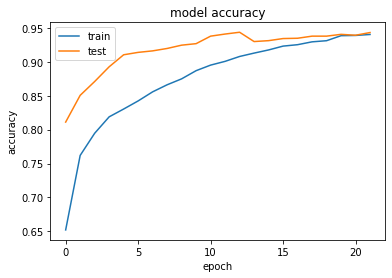

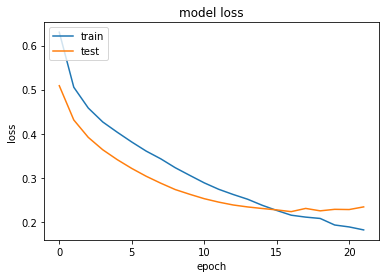

1445/1445 [==============================] - 0s 95us/step
[0.2589386627284301, 0.8802767992019653]
AUC: 0.9236068895643365


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy    Recall  Precision       AUC        F1      F0.5
0             0.05  0.495502  0.971429   0.044619  0.727558  0.085320  0.055141
1             0.10  0.663668  0.914286   0.062136  0.785866  0.116364  0.076372
2             0.15  0.721799  0.914286   0.074246  0.815653  0.137339  0.090961
3             0.20  0.761246  0.914286   0.085561  0.835866  0.156479  0.104507
4             0.25  0.791003  0.914286   0.096677  0.851114  0.174863  0.117734
5             0.30  0.824221  0.914286   0.113074  0.868136  0.201258  0.137104
6             0.35  0.847751  0.885714   0.125506  0.866261  0.219858  0.151515
7             0.40  0.861592  0.885714   0.136564  0.873354  0.236641  0.164369
8             0.45  0.874048  0.885714   0.148325  0.879737  0.254098  0.177956
9             0.50  0.880277  0.857143   0.151515  0.868997  0.257511  0.181378
10            0.55  0.898270  0.828571   0.170588  0.864286  0.282927  0.202797
11            0.60  0.907958  0.771429  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 9172 samples, validate on 2292 samples
Epoch 1/50
 - 2s - loss: 0.5674 - accuracy: 0.7001 - val_loss: 0.5134 - val_accuracy: 0.7448
Epoch 2/50
 - 2s - loss: 0.4644 - accuracy: 0.7655 - val_loss: 0.4495 - val_accuracy: 0.7251
Epoch 3/50
 - 1s - loss: 0.4155 - accuracy: 0.7987 - val_loss: 0.4038 - val_accuracy: 0.7984
Epoch 4/50
 - 1s - loss: 0.3773 - accuracy: 0.8244 - val_loss: 0.3710 - val_accuracy: 0.9040
Epoch 5/50
 - 2s - loss: 0.3524 - accuracy: 0.8473 - val_loss: 0.3448 - val_accuracy: 0.9031
Epoch 6/50
 - 2s - loss: 0.3240 - accuracy: 0.8694 - val_loss: 0.3230 - val_accuracy: 0.9040
Epoch 7/50
 - 1s - loss: 0.2998 - accuracy: 0.8921 - val_loss: 0.3037 - val_accuracy: 0.9062
Epoch 8/50
 - 1s - loss: 0.2727 - accuracy: 0.9103 - val_loss: 0.2829 - val_accuracy: 0.9149
Epoch 9/50
 - 1s - loss: 0.2476 - accuracy: 0.9287 - val_loss: 0.2624 - val_accuracy: 0.9167
Epoch 10/50
 - 1s - loss: 0.2268 - accuracy: 0.9422 - val_loss: 0.2415 - val_accuracy: 0.9197
Epoch 11/50
 - 

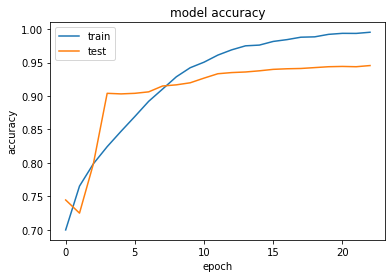

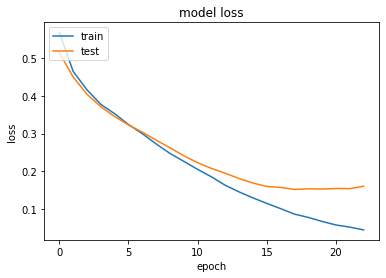

1445/1445 [==============================] - 0s 100us/step
[0.10767842862484364, 0.9903114438056946]
AUC: 0.8398464759246337


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy    Recall  Precision       AUC        F1      F0.5
0             0.05  0.656747  0.833333   0.019841  0.744301  0.038760  0.024655
1             0.10  0.741869  0.833333   0.026247  0.787218  0.050891  0.032552
2             0.15  0.821453  0.833333   0.037594  0.827344  0.071942  0.046468
3             0.20  0.896886  0.833333   0.063694  0.865376  0.118343  0.078125
4             0.25  0.926644  0.833333   0.087719  0.880379  0.158730  0.106838
5             0.30  0.954325  0.833333   0.135135  0.894336  0.232558  0.162338
6             0.35  0.970242  0.833333   0.196078  0.902361  0.317460  0.231481
7             0.40  0.978547  0.833333   0.256410  0.906548  0.392157  0.297619
8             0.45  0.986159  0.833333   0.357143  0.910386  0.500000  0.403226
9             0.50  0.990311  0.833333   0.454545  0.912480  0.588235  0.500000
10            0.55  0.991696  0.833333   0.500000  0.913177  0.625000  0.543478
11            0.60  0.992388  0.833333  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 9228 samples, validate on 2308 samples
Epoch 1/50
 - 2s - loss: 0.6541 - accuracy: 0.6533 - val_loss: 0.5103 - val_accuracy: 0.8224
Epoch 2/50
 - 1s - loss: 0.4706 - accuracy: 0.8298 - val_loss: 0.3910 - val_accuracy: 0.8804
Epoch 3/50
 - 1s - loss: 0.3884 - accuracy: 0.8831 - val_loss: 0.3122 - val_accuracy: 0.9194
Epoch 4/50
 - 1s - loss: 0.3183 - accuracy: 0.9212 - val_loss: 0.2573 - val_accuracy: 0.9415
Epoch 5/50
 - 1s - loss: 0.2671 - accuracy: 0.9379 - val_loss: 0.2081 - val_accuracy: 0.9554
Epoch 6/50
 - 1s - loss: 0.2132 - accuracy: 0.9555 - val_loss: 0.1619 - val_accuracy: 0.9701
Epoch 7/50
 - 1s - loss: 0.1708 - accuracy: 0.9671 - val_loss: 0.1288 - val_accuracy: 0.9731
Epoch 8/50
 - 1s - loss: 0.1335 - accuracy: 0.9766 - val_loss: 0.1004 - val_accuracy: 0.9792
Epoch 9/50
 - 1s - loss: 0.1066 - accuracy: 0.9813 - val_loss: 0.0804 - val_accuracy: 0.9861
Epoch 10/50
 - 1s - loss: 0.0860 - accuracy: 0.9850 - val_loss: 0.0671 - val_accuracy: 0.9900
Epoch 11/50
 - 

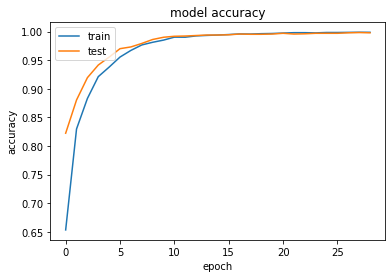

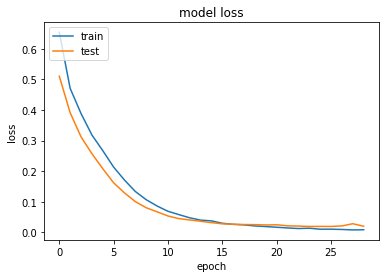

1445/1445 [==============================] - 0s 100us/step
[0.010677241145755618, 0.995847761631012]
AUC: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy    Recall  Precision       AUC        F1      F0.5
0             0.05  0.977855  1.000000   0.085714  0.988904  0.157895  0.104895
1             0.10  0.984775  1.000000   0.120000  0.992372  0.214286  0.145631
2             0.15  0.988927  1.000000   0.157895  0.994452  0.272727  0.189873
3             0.20  0.990311  1.000000   0.176471  0.995146  0.300000  0.211268
4             0.25  0.991696  1.000000   0.200000  0.995839  0.333333  0.238095
5             0.30  0.993080  1.000000   0.230769  0.996533  0.375000  0.272727
6             0.35  0.993772  1.000000   0.250000  0.996879  0.400000  0.294118
7             0.40  0.994464  1.000000   0.272727  0.997226  0.428571  0.319149
8             0.45  0.995156  1.000000   0.300000  0.997573  0.461538  0.348837
9             0.50  0.995848  1.000000   0.333333  0.997920  0.500000  0.384615
10            0.55  0.996540  1.000000   0.375000  0.998266  0.545455  0.428571
11            0.60  0.997924  1.000000  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 9180 samples, validate on 2296 samples
Epoch 1/50
 - 2s - loss: 0.6308 - accuracy: 0.6382 - val_loss: 0.5220 - val_accuracy: 0.8767
Epoch 2/50
 - 1s - loss: 0.4425 - accuracy: 0.8592 - val_loss: 0.4133 - val_accuracy: 0.8458
Epoch 3/50
 - 2s - loss: 0.3507 - accuracy: 0.8890 - val_loss: 0.3370 - val_accuracy: 0.8393
Epoch 4/50
 - 1s - loss: 0.2880 - accuracy: 0.9037 - val_loss: 0.2823 - val_accuracy: 0.9120
Epoch 5/50
 - 1s - loss: 0.2403 - accuracy: 0.9154 - val_loss: 0.2432 - val_accuracy: 0.9177
Epoch 6/50
 - 1s - loss: 0.2028 - accuracy: 0.9313 - val_loss: 0.2132 - val_accuracy: 0.9255
Epoch 7/50
 - 1s - loss: 0.1767 - accuracy: 0.9425 - val_loss: 0.1927 - val_accuracy: 0.9499
Epoch 8/50
 - 1s - loss: 0.1550 - accuracy: 0.9535 - val_loss: 0.1735 - val_accuracy: 0.9621
Epoch 9/50
 - 1s - loss: 0.1372 - accuracy: 0.9602 - val_loss: 0.1589 - val_accuracy: 0.9699
Epoch 10/50
 - 1s - loss: 0.1216 - accuracy: 0.9673 - val_loss: 0.1466 - val_accuracy: 0.9739
Epoch 11/50
 - 

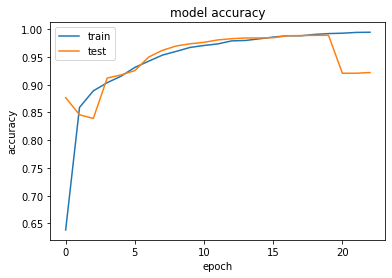

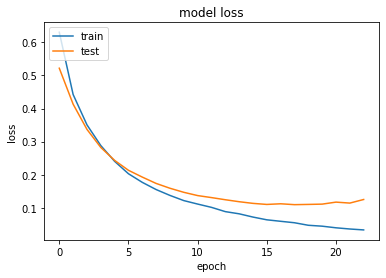

1445/1445 [==============================] - 0s 94us/step
[0.07415765028408242, 0.9861591458320618]
AUC: 0.8525421579814886


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy    Recall  Precision       AUC        F1      F0.5
0             0.05  0.816609  0.818182   0.033088  0.817389  0.063604  0.040946
1             0.10  0.880277  0.818182   0.050000  0.849467  0.094241  0.061560
2             0.15  0.909343  0.818182   0.065217  0.864112  0.120805  0.079929
3             0.20  0.930796  0.818182   0.084112  0.874921  0.152542  0.102506
4             0.25  0.952941  0.818182   0.120000  0.886078  0.209302  0.144695
5             0.30  0.966090  0.818182   0.160714  0.892703  0.268657  0.191489
6             0.35  0.975779  0.818182   0.214286  0.897585  0.339623  0.251397
7             0.40  0.979239  0.818182   0.243243  0.899328  0.375000  0.283019
8             0.45  0.984775  0.818182   0.310345  0.902117  0.450000  0.354331
9             0.50  0.986159  0.818182   0.333333  0.902815  0.473684  0.378151
10            0.55  0.988235  0.818182   0.375000  0.903861  0.514286  0.420561
11            0.60  0.988235  0.818182  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 9218 samples, validate on 2304 samples
Epoch 1/50
 - 2s - loss: 0.6685 - accuracy: 0.5912 - val_loss: 0.5821 - val_accuracy: 0.8420
Epoch 2/50
 - 1s - loss: 0.5312 - accuracy: 0.7949 - val_loss: 0.4787 - val_accuracy: 0.9418
Epoch 3/50
 - 1s - loss: 0.4446 - accuracy: 0.8763 - val_loss: 0.4010 - val_accuracy: 0.9410
Epoch 4/50
 - 1s - loss: 0.3717 - accuracy: 0.9125 - val_loss: 0.3335 - val_accuracy: 0.9527
Epoch 5/50
 - 1s - loss: 0.3044 - accuracy: 0.9447 - val_loss: 0.2825 - val_accuracy: 0.9596
Epoch 6/50
 - 1s - loss: 0.2493 - accuracy: 0.9607 - val_loss: 0.2316 - val_accuracy: 0.9705
Epoch 7/50
 - 1s - loss: 0.2032 - accuracy: 0.9711 - val_loss: 0.1944 - val_accuracy: 0.9774
Epoch 8/50
 - 1s - loss: 0.1728 - accuracy: 0.9741 - val_loss: 0.1643 - val_accuracy: 0.9809
Epoch 9/50
 - 1s - loss: 0.1422 - accuracy: 0.9822 - val_loss: 0.1425 - val_accuracy: 0.9831
Epoch 10/50
 - 1s - loss: 0.1178 - accuracy: 0.9829 - val_loss: 0.1236 - val_accuracy: 0.9887
Epoch 11/50
 - 

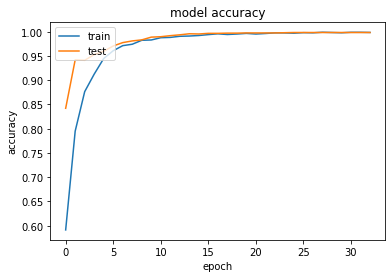

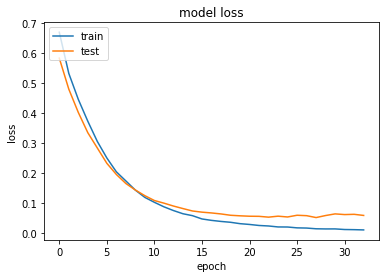

1445/1445 [==============================] - 0s 130us/step
[0.015313190171514415, 0.9965397715568542]
AUC: 0.9936111111111111


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy  Recall  Precision       AUC        F1      F0.5
0             0.05  0.972318     0.8   0.093023  0.886458  0.166667  0.112994
1             0.10  0.982699     0.8   0.142857  0.891667  0.242424  0.170940
2             0.15  0.986851     0.8   0.181818  0.893750  0.296296  0.215054
3             0.20  0.991003     0.8   0.250000  0.895833  0.380952  0.289855
4             0.25  0.992388     0.8   0.285714  0.896528  0.421053  0.327869
5             0.30  0.992388     0.8   0.285714  0.896528  0.421053  0.327869
6             0.35  0.994464     0.8   0.363636  0.897569  0.500000  0.408163
7             0.40  0.995848     0.8   0.444444  0.898264  0.571429  0.487805
8             0.45  0.995848     0.8   0.444444  0.898264  0.571429  0.487805
9             0.50  0.996540     0.8   0.500000  0.898611  0.615385  0.540541
10            0.55  0.996540     0.8   0.500000  0.898611  0.615385  0.540541
11            0.60  0.996540     0.8   0.500000  0.898611  0.615

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 9180 samples, validate on 2296 samples
Epoch 1/50
 - 2s - loss: 0.6331 - accuracy: 0.6902 - val_loss: 0.5277 - val_accuracy: 0.7888
Epoch 2/50
 - 1s - loss: 0.4340 - accuracy: 0.8610 - val_loss: 0.4387 - val_accuracy: 0.7840
Epoch 3/50
 - 1s - loss: 0.3418 - accuracy: 0.8980 - val_loss: 0.3933 - val_accuracy: 0.7831
Epoch 4/50
 - 1s - loss: 0.2822 - accuracy: 0.9149 - val_loss: 0.3722 - val_accuracy: 0.7883
Epoch 5/50
 - 1s - loss: 0.2446 - accuracy: 0.9223 - val_loss: 0.3572 - val_accuracy: 0.7936
Epoch 6/50
 - 1s - loss: 0.2127 - accuracy: 0.9343 - val_loss: 0.3516 - val_accuracy: 0.7940
Epoch 7/50
 - 1s - loss: 0.1939 - accuracy: 0.9390 - val_loss: 0.3593 - val_accuracy: 0.7953
Epoch 8/50
 - 1s - loss: 0.1733 - accuracy: 0.9451 - val_loss: 0.3551 - val_accuracy: 0.7962
Epoch 9/50
 - 1s - loss: 0.1564 - accuracy: 0.9513 - val_loss: 0.3603 - val_accuracy: 0.7966
Epoch 10/50
 - 1s - loss: 0.1440 - accuracy: 0.9570 - val_loss: 0.3601 - val_accuracy: 0.7979
Epoch 11/50
 - 

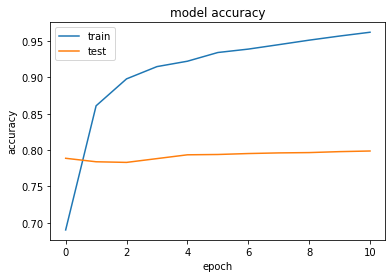

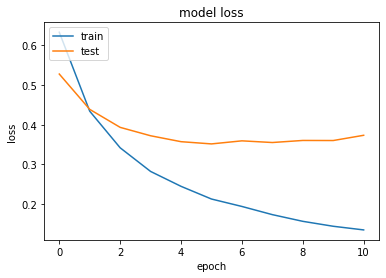

1445/1445 [==============================] - 0s 96us/step
[0.1768826720830066, 0.9564014077186584]
AUC: 0.9959581881533102


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy  Recall  Precision       AUC        F1      F0.5
0             0.05  0.521107     1.0   0.014245  0.758885  0.028090  0.017743
1             0.10  0.600000     1.0   0.017007  0.798606  0.033445  0.021169
2             0.15  0.644983     1.0   0.019120  0.821254  0.037523  0.023787
3             0.20  0.682353     1.0   0.021322  0.840070  0.041754  0.026511
4             0.25  0.752249     1.0   0.027174  0.875261  0.052910  0.033738
5             0.30  0.895502     1.0   0.062112  0.947387  0.116959  0.076453
6             0.35  0.927336     1.0   0.086957  0.963415  0.160000  0.106383
7             0.40  0.943945     1.0   0.109890  0.971777  0.198020  0.133690
8             0.45  0.950173     1.0   0.121951  0.974913  0.217391  0.147929
9             0.50  0.956401     1.0   0.136986  0.978049  0.240964  0.165563
10            0.55  0.964014     1.0   0.161290  0.981882  0.277778  0.193798
11            0.60  0.970242     1.0   0.188679  0.985017  0.317

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1e-05
Train on 9168 samples, validate on 2292 samples
Epoch 1/50
 - 2s - loss: 0.6215 - accuracy: 0.6614 - val_loss: 0.5502 - val_accuracy: 0.6767
Epoch 2/50
 - 1s - loss: 0.4967 - accuracy: 0.8128 - val_loss: 0.4717 - val_accuracy: 0.7949
Epoch 3/50
 - 2s - loss: 0.4174 - accuracy: 0.8789 - val_loss: 0.4161 - val_accuracy: 0.7888
Epoch 4/50
 - 2s - loss: 0.3520 - accuracy: 0.9043 - val_loss: 0.3743 - val_accuracy: 0.7945
Epoch 5/50
 - 1s - loss: 0.2978 - accuracy: 0.9160 - val_loss: 0.3516 - val_accuracy: 0.8495
Epoch 6/50
 - 2s - loss: 0.2565 - accuracy: 0.9320 - val_loss: 0.3325 - val_accuracy: 0.8512
Epoch 7/50
 - 1s - loss: 0.2262 - accuracy: 0.9402 - val_loss: 0.3248 - val_accuracy: 0.8525
Epoch 8/50
 - 1s - loss: 0.2007 - accuracy: 0.9473 - val_loss: 0.3176 - val_accuracy: 0.8512
Epoch 9/50
 - 1s - loss: 0.1781 - accuracy: 0.9535 - val_loss: 0.3078 - val_accuracy: 0.8530
Epoch 10/50
 - 1s - loss: 0.1618 - accuracy: 0.9590 - val_loss: 0.3035 - val_accuracy: 0.8538
Epoch 11/50
 - 

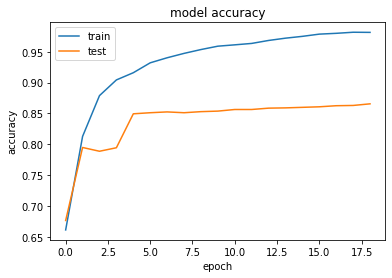

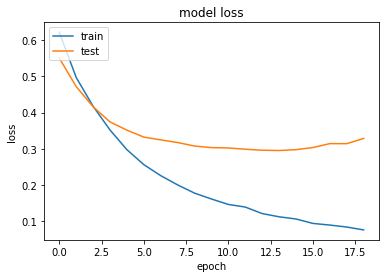

1445/1445 [==============================] - 0s 101us/step
[0.12449948896998765, 0.9591695666313171]
AUC: 0.9958100558659218


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Punto de corte  Accuracy    Recall  Precision       AUC        F1      F0.5
0             0.05  0.648443  1.000000   0.024952  0.822626  0.048689  0.030997
1             0.10  0.773010  1.000000   0.038123  0.885475  0.073446  0.047204
2             0.15  0.856747  1.000000   0.059091  0.927723  0.111588  0.072788
3             0.20  0.903806  1.000000   0.085526  0.951466  0.157576  0.104670
4             0.25  0.929412  1.000000   0.113043  0.964385  0.203125  0.137421
5             0.30  0.935640  1.000000   0.122642  0.967528  0.218487  0.148741
6             0.35  0.939792  1.000000   0.130000  0.969623  0.230088  0.157385
7             0.40  0.947405  1.000000   0.146067  0.973464  0.254902  0.176152
8             0.45  0.952941  1.000000   0.160494  0.976257  0.276596  0.192878
9             0.50  0.959170  1.000000   0.180556  0.979399  0.305882  0.215947
10            0.55  0.962630  1.000000   0.194030  0.981145  0.325000  0.231317
11            0.60  0.968858  1.000000  

In [0]:
for i in to_train_cols:
  print('Training',i,'----------------------------------------------------------')
  automated_train(df_Y_total[i],i)
  gc.collect()